In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={"figure.dpi":100, 'savefig.dpi':200})

In [3]:
# Load the DataFrame from a file
df = pd.read_csv('data/new_df.csv')

In [4]:
df.head()

,marital status,course,daytime/evening attendance,displaced,debtor,tuition fees up to date,gender,scholarship holder,unemployment rate,gdp,target
0,Single,Animation,Daytime,1,0,1,Male,0,10.8,1.74,Dropout
1,Single,Tourism,Daytime,1,0,0,Male,0,13.9,0.79,Graduate
2,Single,Communication,Daytime,1,0,0,Male,0,10.8,1.74,Dropout
3,Single,Journalism,Daytime,1,0,1,Female,0,9.4,-3.12,Graduate
4,Married,Social Service,Evening,0,0,1,Female,0,13.9,0.79,Graduate


In [5]:
df['target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: target, dtype: int64

In [6]:
df_clean = df[df['target'] != "Enrolled"]

In [7]:
df_clean['displaced'] = df_clean['displaced'].apply(lambda x: "Displaced" if x == 1 else "Not displaced")
df_clean['debtor'] = df_clean['debtor'].apply(lambda x: "Debtor" if x == 1 else "No debt")
df_clean['tuition fees up to date'] = df_clean['tuition fees up to date'].apply(lambda x: "Behind payments" if x == 0 else "Up-to-date payments")
df_clean['scholarship holder'] = df_clean['scholarship holder'].apply(lambda x: "Scholarship" if x == 1 else "No scholarship")

<ipython-input-7-5f3e2a4ea33c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['displaced'] = df_clean['displaced'].apply(lambda x: "Displaced" if x == 1 else "Not displaced")
<ipython-input-7-5f3e2a4ea33c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['debtor'] = df_clean['debtor'].apply(lambda x: "Debtor" if x == 1 else "No debt")
<ipython-input-7-5f3e2a4ea33c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

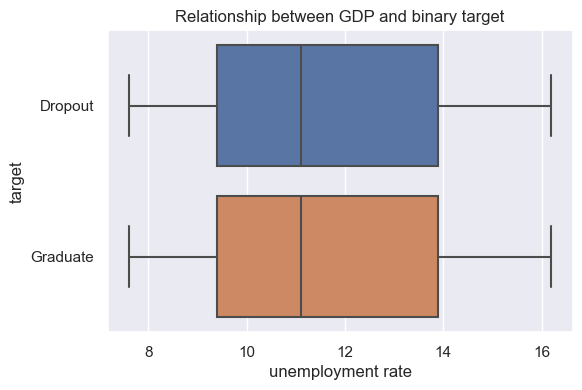

In [8]:
sns.boxplot(x='unemployment rate', y='target', data=df_clean)

# Add a title to the graph
plt.title('Relationship between GDP and binary target')

# Display the graph
plt.show()

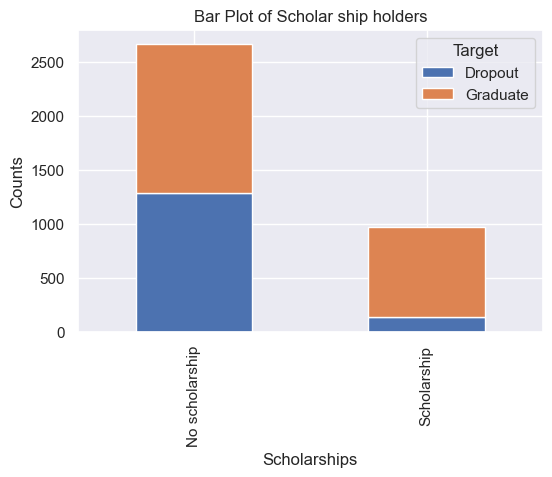

In [9]:
counts = df_clean.groupby(['scholarship holder', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='scholarship holder', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Scholarships')
plt.ylabel('Counts')
plt.title('Bar Plot of Scholar ship holders')
plt.legend(title='Target')
plt.show()

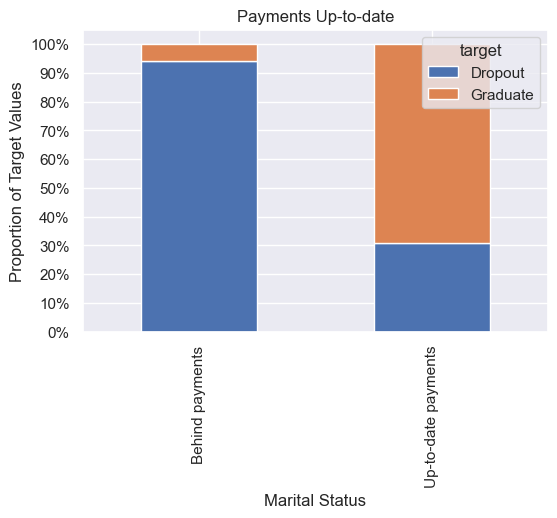

In [28]:
grouped = df_clean.groupby('tuition fees up to date')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Payments Up-to-date')
plt.show()

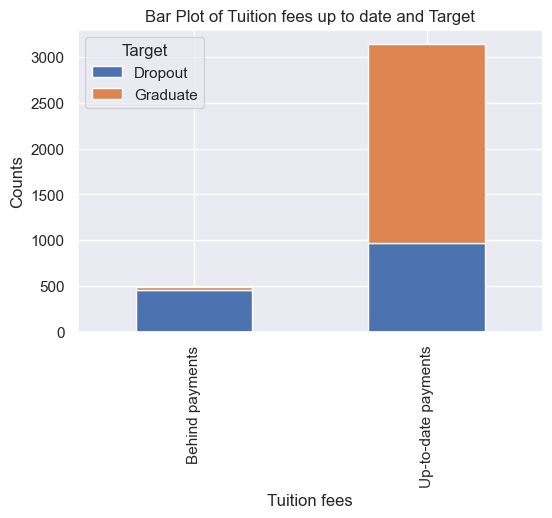

In [11]:
counts = df_clean.groupby(['tuition fees up to date', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='tuition fees up to date', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Tuition fees')
plt.ylabel('Counts')
plt.title('Bar Plot of Tuition fees up to date and Target')
plt.legend(title='Target')
plt.show()

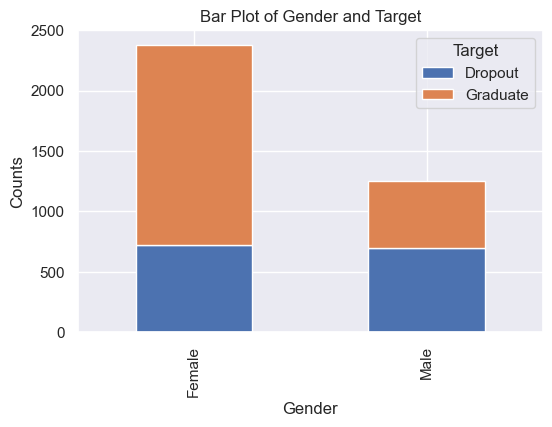

In [12]:
counts = df_clean.groupby(['gender', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='gender', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Bar Plot of Gender and Target')
plt.legend(title='Target')
plt.show()

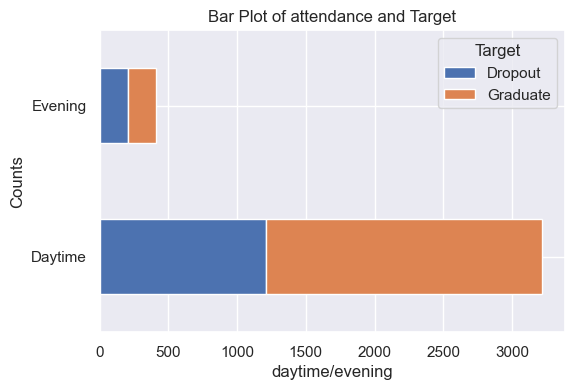

In [26]:
counts = df_clean.groupby(['daytime/evening attendance', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='daytime/evening attendance', columns='target', values='Counts')
counts.plot.barh(stacked=True)
plt.xlabel('daytime/evening')
plt.ylabel('Counts')
plt.title('Bar Plot of attendance and Target')
plt.legend(title='Target')
plt.show()

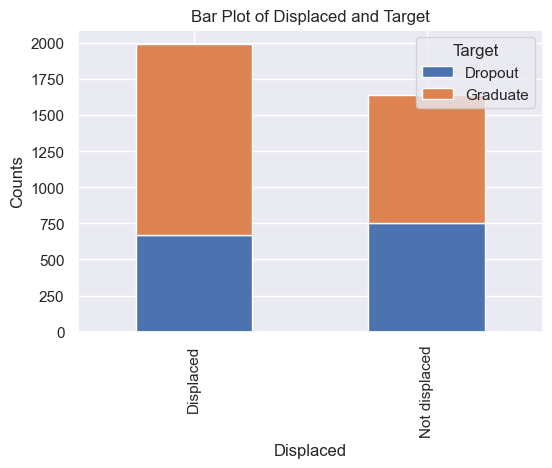

In [14]:
counts = df_clean.groupby(['displaced', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='displaced', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Displaced')
plt.ylabel('Counts')
plt.title('Bar Plot of Displaced and Target')
plt.legend(title='Target')
plt.show()

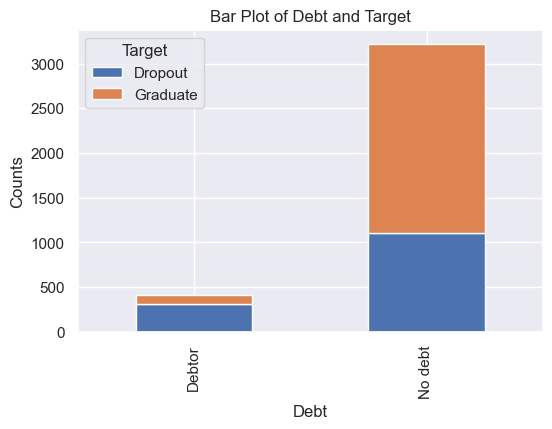

In [15]:
counts = df_clean.groupby(['debtor', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='debtor', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Debt')
plt.ylabel('Counts')
plt.title('Bar Plot of Debt and Target')
plt.legend(title='Target')
plt.show()

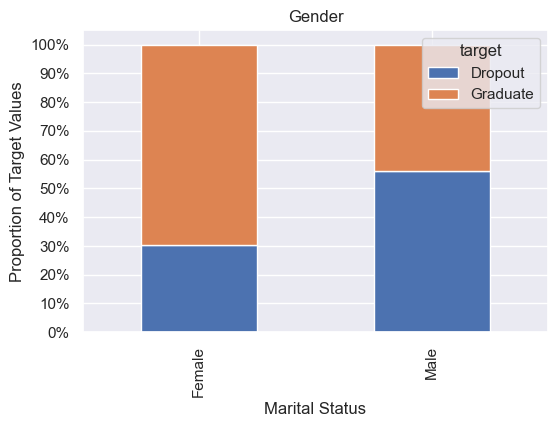

In [16]:
grouped = df_clean.groupby('gender')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Gender')
plt.show()

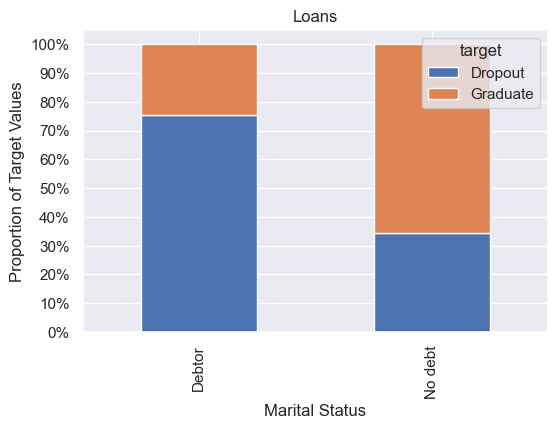

In [24]:
grouped = df_clean.groupby('debtor')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Loans')
plt.show()

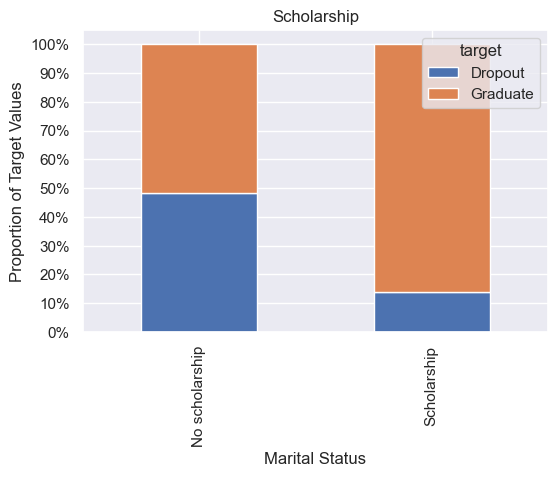

In [18]:
grouped = df_clean.groupby('scholarship holder')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Scholarship')
plt.show()

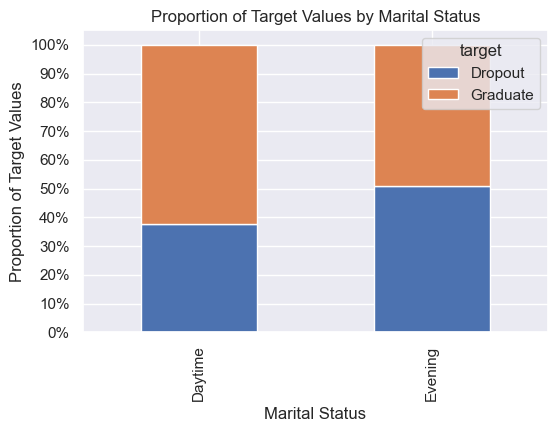

In [19]:
grouped = df_clean.groupby('daytime/evening attendance')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Proportion of Target Values by Marital Status')
plt.show()

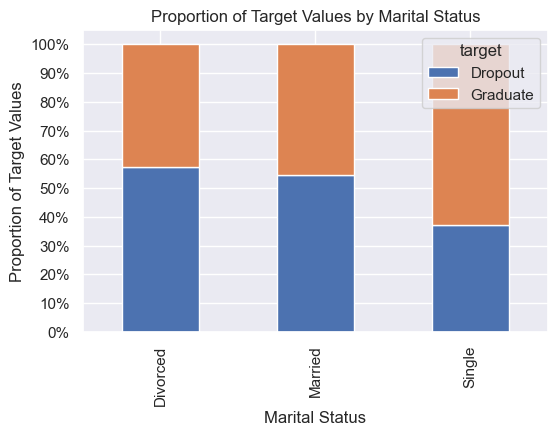

In [20]:
grouped = df_clean.groupby('marital status')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Proportion of Target Values by Marital Status')
plt.show()

In [21]:
df_clean['course'].replace({ 'Biofuel Technologies' : 'Biochemestry', "Informatics Engineering" : 'Engineering',
                            "Equiniculture" : 'Psychology', "Management" : 'Business Administration',
                            "Basic Education": 'Education', 'Agronomy' : 'Biology', 'Oral Hygiene': 'Dentist'},
                       inplace=True)

C:\Users\josec\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


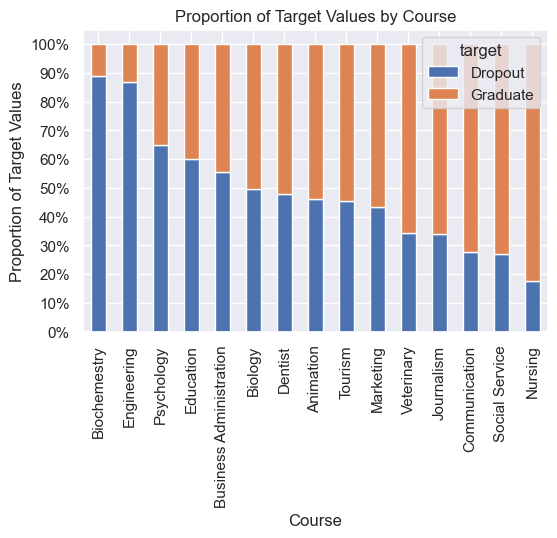

In [22]:
grouped = df_clean.groupby('course')['target'].value_counts(normalize=True).unstack()

# Sort the rows of the dataframe based on the count of 1's in descending order
grouped = grouped.sort_values(by=['Dropout'], ascending=False)

# Create a stacked bar chart
grouped.plot(kind='bar', stacked=True)

# Set the x-axis label
plt.xlabel('Course')

# Set the y-axis label
plt.ylabel('Proportion of Target Values')

# Set the y-axis tick labels
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])

# Set the title of the graph
plt.title('Proportion of Target Values by Course')

# Show the graph
plt.show()

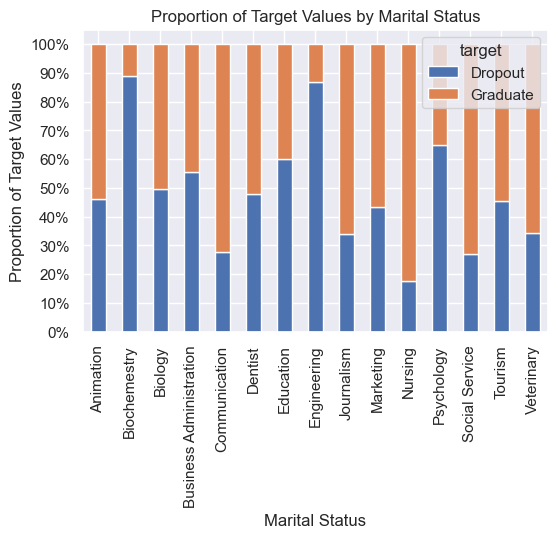

In [23]:
grouped = df_clean.groupby('course')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Proportion of Target Values by Marital Status')
plt.show()